In [18]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from underthesea import sent_tokenize
from datetime import datetime

In [2]:
with open('./trained_model/nlp_svm_model.pkl', 'rb') as svm:
    svm_model = pickle.load(svm)
with open('./trained_model/vectorizer_model.pkl', 'rb') as vec:
    vectorizer = pickle.load(vec)

In [25]:
df_vne = pd.read_csv('./vneconomy_articles.csv')
df_vs = pd.read_csv('./vietstock_articles.csv')

In [26]:
df = pd.merge(df_vne, df_vs, how='outer', on=['Date'])

In [27]:
df_stock = pd.read_csv('./VN100_cleaned.csv', sep='\t', encoding='utf-16')
df_stock['Ngày'] = pd.to_datetime(df_stock['Ngày'])
df_stock.sort_values(by='Ngày', ascending=True, inplace=True)

In [28]:
for i in range(len(df)-1):
    if df.loc[i][1:].count() <= 2:
        df.drop(i, inplace=True)
df.reset_index(drop=True,inplace=True)

In [29]:
df["Date"] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.sort_values(by='Date', inplace=True)

In [30]:
sentiment_by_date = []
for i in range(len(df)):
    articles = df.iloc[i].dropna()[1:]
    articles_content = ''
    sentiment_list = []
    for j in range(len(articles)):
        articles_content += articles[j]
    sentences_list = sent_tokenize(articles_content)
    for k in range(len(sentences_list)):
        input_text = vectorizer.transform([sentences_list[k]])
        sentiment_list.append(svm_model.predict(input_text))
    sentiment_dayAvg = sum(sentiment_list) / len(sentiment_list)
    sentiment_by_date.append(float(sentiment_dayAvg))

In [31]:
plot_dates = df['Date']
plot_index = list(np.cumsum(sentiment_by_date))

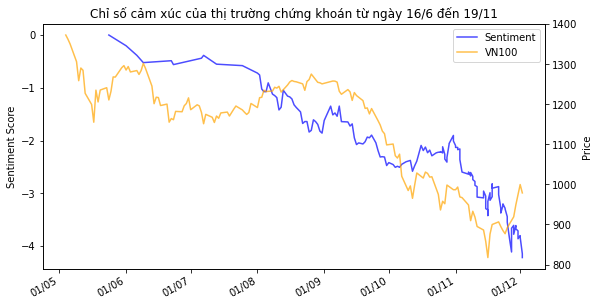

In [32]:
fig, ax = plt.subplots()
ax_ = ax.twinx()

fig.set_figheight(5)
fig.set_figwidth(9)
alpha = .7

line1 = ax.plot(plot_dates, plot_index, color='blue', label='Sentiment', alpha=alpha)
ax.set_ylabel('Sentiment Score')
line2 = ax_.plot(df_stock["Ngày"], df_stock["Mở"], color='orange', label='VN100', alpha=alpha)
ax_.set_ylabel('Price')

leg = line1 + line2
labs = [l.get_label() for l in leg]
ax.legend(leg, labs)

ax.xaxis.set_major_formatter(DateFormatter('%d/%m'))
fig.autofmt_xdate()

plt.title('Chỉ số cảm xúc của thị trường chứng khoán từ ngày 16/6 đến 19/11')

plt.show()

In [34]:
df

,Date,Article 1_x,Article 2_x,Article 3_x,Article 4_x,Article 5_x,Article 1_y,Article 2_y,Article 3_y,Article 4_y,...,Article 7,Article 8,Article 9,Article 10,Article 11,Article 12,Article 13,Article 14,Article 15,Article 16
0,2022-05-24,Chứng khoán BSC vừa cập nhật triển vọng cổ ph...,Vn-Index tiếp tục mất thêm gần 9 điểm nữa sau...,Giá vàng thế giới duy trì xu thế tăng lên gần...,"Theo tin từ CNN, công ty năng lượng Orsted củ...","Thống kê từ Kis Việt Nam cho thấy, dòng vốn E...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-01,Bình luận về chu kỳ kinh tế và ảnh hưởng lên ...,Nhịp lao dốc quyết định ở chỉ số VN-Index xuấ...,"Theo đại biểu Lý Tiết Hạnh (Bình Định), thời ...",Bên cạnh áp lực tẩy chay Nga do cuộc chiến tạ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-06,Giá khí đốt tại thị trường châu Âu giảm mạnh ...,Đứng đầu Chỉ số Nơi đáng sống toàn cầu (Globa...,Giá vàng thế giới sụt mạnh và đã tuột khỏi mố...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-09,"Lãi suất tăng mạnh ở Mỹ, việc nền kinh tế Mỹ ...",Công ty Cổ phần Phục vụ Mặt đất Sài Gòn (mã S...,Thị trường về điểm số không quá nhiều biến độ...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-22,"Chia sẻ với báo chí cuối tuần qua, Thống đốc ...",Lại một phiên tăng rất đẹp nữa của Vn-Index d...,Số liệu công bố cách đây 2 tuần cho thấy tổng...,Ông Bùi Quang Anh Vũ thông báo giao dịch cổ p...,Giá vàng thế giới giảm mạnh trong phiên giao ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-11-30,Giá vàng thế giới tăng mạnh khi đồng USD tụt ...,Đồng USD đang tăng giá so với gần như mọi đồn...,NaN,NaN,NaN,"Chỉ trong vòng 15 phút của phiên ATO, cầu bắt ...",Trong một ngày thông tin tiêu cực tràn ngập bủ...,Trong phiên giao dịch buổi sáng ngày 10/11/202...,Khối lượng giao dịch của VN-Index đạt hơn 666 ...,...,Trong phiên giao dịch buổi sáng ngày 28/11/202...,CTCK Bản Việt (VCSC): Dự báo trong phiên giao ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,2022-12-01,Thị trường chứng khoán Mỹ tăng điểm trở lại t...,NaN,NaN,NaN,NaN,"Giao dịch: Trong phiên cuối tuần, VN-Index tăn...",Các cổ phiếu này được chọn lọc theo các tín hi...,* Dòng tiền rút khỏi cổ phiếu chứng khoán sàn ...,DGW cho rằng việc giá cổ phiếu giảm mạnh trong...,...,Tiếp nối hiệu ứng giải cứu ở cổ phiếu của các ...,Các cổ phiếu này được chọn lọc theo các tín hi...,Các cổ phiếu này được chọn lọc theo các tín hi...,* Xuất hiện dòng tiền giải cứu cổ phiếu bất độ...,"Qua theo dõi giao dịch trên sàn chứng khoán, g...",NaN,NaN,NaN,NaN,NaN
117,2022-12-01,Thị trường chứng khoán Mỹ tăng điểm trở lại t...,NaN,NaN,NaN,NaN,"Kết thúc phiên sáng, chỉ số ngành ngân hàng tă...",* Xử lý xong tiền đặt cọc hơn 1.051 tỉ đồng củ...,"* Danh sách các mã tăng, giảm giá nhiều nhất x...",Các cổ phiếu này được chọn lọc theo các tín hi...,...,"Trong thông tin công bố ngày 11/11, UBCKNN cho...",Kết phiên VN-Index chỉ còn giảm 22.66 điểm (2....,Các cổ phiếu này được chọn lọc theo các tín hi...,"Theo đó, hơn 39.32 triệu cp DBW sẽ bị hủy đăng...",CTCK Tân Việt (TVSI): Diễn biến phiên giao dịc...,NaN,NaN,NaN,NaN,NaN
150,2022-12-02,NaN,NaN,NaN,NaN,NaN,- Thị trường chứng khoán tiếp tục giao dịch ti...,Khối lượng giao dịch của VN-Index đạt hơn 666 ...,"* Danh sách các mã tăng, giảm giá nhiều nhất x...",* Phát Đạt chuyển nhượng hơn 28 triệu cp của C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#End